In [ ]:
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
fertility = fetch_openml(name='lupus')

print(fertility.DESCR)

# Бизнес-задача: прогнозирование вероятности риска развития волчаночного нефрита на основе различных факторов.
# Задача машинного обучения: бинарной классификации, для предсказания развития волчаночного нефрита

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

87 persons with lupus nephritis. Followed up 15+ years. 35 deaths. Var =
duration of disease. Over 40 baseline variables avaiable from authors.
Description :
For description of this data set arising from 87 persons
with lupus nephritis followed for 15+ years after an initial
renal biopsy (the starting point of follow-up) see the introduction to
Abrahamowicz, MacKenzie and Esdaile (December 1996 issue).
This data set only contains time to death/censoring, indicator,
duration and log(1+duration), where duration is the duration
of untreated  disease prior to biopsy. This variable was the
focus in the aforementioned JASA article because it clearly
violates the proportionality of hazards assumption. More than
40 other variables acquired at baseline are available from
authors.
Permission :
This data can be freely used for non-commercial purposes and
distributed freely.
Michal Abrahamowicz, Todd MacKenzie and John Esdail

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2) Выполните анализ и обработку дата-сета

In [ ]:
df = pd.DataFrame(data=fertility.data, columns=fertility.feature_names)
target = pd.DataFrame(data = fertility.target)
print("Основная статистическая информация о данных:")
print(df.describe())
print("-----------------------------------------------------------------------")
print("Проверка дисбаланса целевого признака:")
target_counts = target.value_counts()
print(target_counts)

Основная статистическая информация о данных:
             TIME    DURATION  LOG(1+DURATION)
count   87.000000   87.000000        87.000000
mean   142.344828   10.480460         1.417816
std     73.356065   21.400716         1.329649
min      4.000000    0.100000         0.100000
25%     87.500000    0.100000         0.100000
50%    147.000000    2.000000         1.100000
75%    193.500000    9.000000         2.300000
max    276.000000  106.000000         4.670000
-----------------------------------------------------------------------
Проверка дисбаланса целевого признака:
STATUS
alive     52
dead      35
Name: count, dtype: int64


Наблюдаем разницу целевой переменной, поэтому используем метод создания синтетических признаков (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
df, target = smote.fit_resample(df, target)
target_counts = target.value_counts()
print(target_counts)

STATUS
alive     52
dead      52
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())
print(df.dtypes)

TIME               0
DURATION           0
LOG(1+DURATION)    0
dtype: int64
TIME                 int64
DURATION           float64
LOG(1+DURATION)    float64
dtype: object


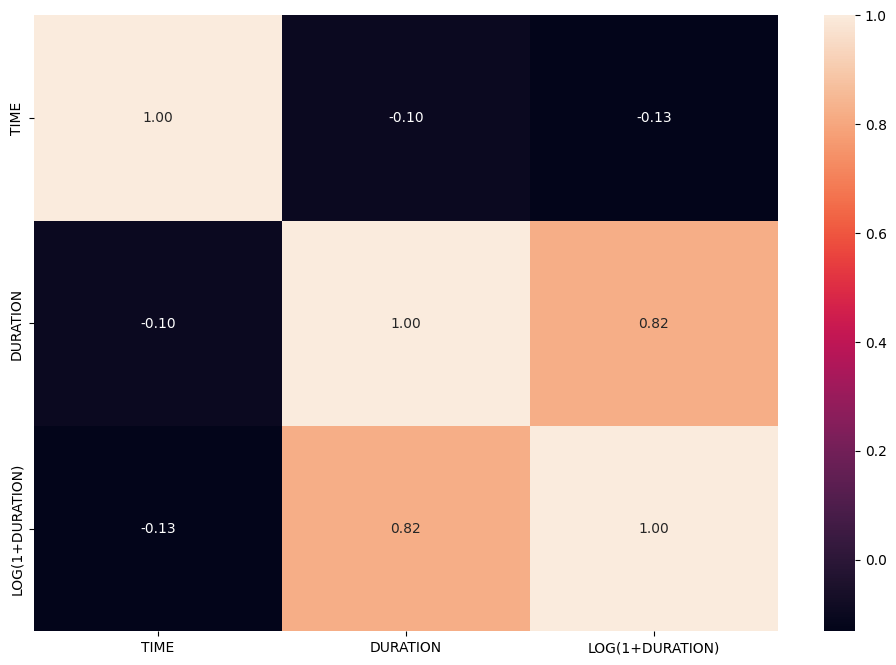

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Подготовка данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42)

3)	Выберите несколько метрик для оценки моделей машинного обучения.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

4)	Постройте 4 модели машинного обучения для решение поставленной задачи.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Логистическая регрессия
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
print("Логистическая регрессия:")
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='alive'))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='alive'))
print("F1 Score:", f1_score(y_test, y_pred_lr, pos_label='alive'))

print('-----'*40)

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("Случайный лес:")
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='alive'))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='alive'))
print("F1 Score:", f1_score(y_test, y_pred_rf, pos_label='alive'))

print('-----'*40)

# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
print("SVM:")
print("Precision:", precision_score(y_test, y_pred_svm, pos_label='alive'))
print("Recall:", recall_score(y_test, y_pred_svm, pos_label='alive'))
print("F1 Score:", f1_score(y_test, y_pred_svm, pos_label='alive'))

print('-----'*40)

# K-ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
print("KNN:")
print("Precision:", precision_score(y_test, y_pred_knn, pos_label='alive'))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='alive'))
print("F1 Score:", f1_score(y_test, y_pred_knn, pos_label='alive'))

print('-----'*40)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-94-f14c1dc4cf06>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Логистическая регрессия:
Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1 Score: 0.7407407407407408
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Случайный лес:
Precision: 0.7857142857142857
Recall: 0.8461538461538461
F1 Score: 0.8148148148148148
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVM:
Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1 Score: 0.7407407407407408
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
KNN:
Precision: 0.7692307692307693
Recall: 0.7692307692307693
F1 Score: 0.7692307692307693
---

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5)	Проведите диагностику лучшей модели из пункта 4.

6)	Сделайте подбор гиперпараметров для лучшей модели из пункта 4.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
print("Лучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая оценка: 0.6794871794871794


7)	Постройте ансамблевую модель машинного обучения.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm), ('knn', knn)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Ансамблевая модель:")
print("Precision:", precision_score(y_test, y_pred_voting, pos_label='alive'))
print("Recall:", recall_score(y_test, y_pred_voting, pos_label='alive'))
print("F1 Score:", f1_score(y_test, y_pred_voting, pos_label='alive'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Ensemble Model:
Precision: 0.75
Recall: 0.9230769230769231
F1 Score: 0.8275862068965517
